# Realtime Facial Expression Recogniton 

# Import Library

In [2]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

# Impor dari TensorFlow dan Keras
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU terdeteksi:")
    for device in physical_devices:
        print(f"- {device}")
else:
    print("Tidak ada GPU yang terdeteksi.")


Tidak ada GPU yang terdeteksi.


In [6]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("GPU is detected")
else:
    print("GPU is not detected")


GPU is detected


In [7]:
def getData(name):  
    main=os.listdir(f'./Dataset/{name}')
    dic={}
    dir=f'./Dataset/{name}'
    print(main)
    for i in main:
        initial_count = 0
        dirr=os.path.join(dir, i)
        for path in os.listdir(dirr):
            if os.path.isfile(os.path.join(dirr, path)):
                initial_count += 1
        dic[i]=initial_count
    courses = list(dic.keys())
    values = list(dic.values())

    fig = plt.figure(figsize = (10, 5))
    plt.bar(courses, values, color ='blue',
            width = 0.5)
    plt.savefig(f'{name}_data_info_face_dataset')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


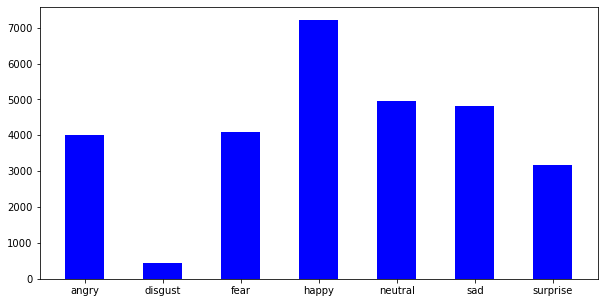

In [8]:
getData('train')

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


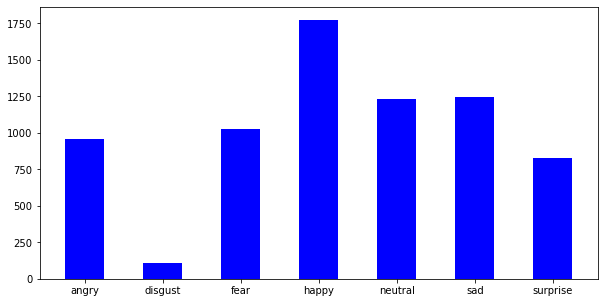

In [9]:
getData('test')

## Mempersiapkan set data pengujian dan validasi

gambar yang sesuai untuk set data pengujian dan validasi disiapkan dan kemudian dimuat.

menggunakan ImageDataGenerator untuk mengoptimalkan gambar untuk jaringan saraf. Pada langkah ini, misalnya, semua nilai dibagi dengan 255 untuk mendapatkan nilai antara 0 dan 1. Hal ini memungkinkan kita untuk meningkatkan kinerja jaringan. 

Tensorflow juga menyediakan metode flow_from_directory(), yang kemudian memuat file dari subdirektori dan secara bersamaan memberikan label pada gambar. Nama folder selalu digunakan sebagai nilai untuk label. Kami juga mengubah dimensi gambar menjadi 100*100 piksel. Hitam dan putih digunakan sebagai mode warna, karena nantinya kita akan membaca gambar real-time dalam warna hitam dan putih.


In [10]:
train_dir = r'./Dataset/train'
test_dir = r'./Dataset/test'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.3,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=64,
                                                target_size=(100,100),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=64,
                                                target_size=(100,100),
                                                shuffle=True,
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model CNN
menggunakan Adam sebagai pengoptimal, karena ini adalah pengoptimal yang sangat efisien untuk klasifikasi gambar.

In [11]:
#Definieren des Neuronalen Netzes

def get_model(input_size, classes=7):
    model = Sequential()   
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(classes, activation='softmax'))

    #Compliling the model
    model.compile(optimizer=Adam(learning_rate=0.0001, decay=1e-6), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [12]:
classes=7
my_model = get_model((100,100,1), classes)
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 128)       7

## Start Model

In [13]:
steps_per_epoch = training_set.n // training_set.batch_size
validation_steps = test_set.n // test_set.batch_size

hist = my_model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50,
                 steps_per_epoch=steps_per_epoch,
                 validation_steps=validation_steps)

# my_model.save('./saved_model/')




  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 448 steps, validate for 112 steps
Epoch 1/50
448/448 [==============================] - 225s 502ms/step - loss: 4.2752 - accuracy: 0.2747 - val_loss: 6.0718 - val_accuracy: 0.1952
Epoch 2/50
448/448 [==============================] - 40s 90ms/step - loss: 3.5894 - accuracy: 0.3370 - val_loss: 3.3385 - val_accuracy: 0.3783
Epoch 3/50
448/448 [==============================] - 43s 95ms/step - loss: 3.1507 - accuracy: 0.3700 - val_loss: 2.8806 - val_accuracy: 0.4074
Epoch 4/50
448/448 [==============================] - 41s 93ms/step - loss: 2.7773 - accuracy: 0.3981 - val_loss: 2.5042 - val_accuracy: 0.4558
Epoch 5/50
448/448 [==============================] - 68s 151ms/step - loss: 2.4692 - accuracy: 0.4231 - val_loss: 2.2967 - val_accuracy: 0.4581
Epoch 6/50
448/448 [==============================] - 45s 100ms/step - loss: 2.2230 - accuracy: 0.4444 - val_loss: 2.0482 - val_accuracy: 0.4727
Epoch 7/50
448/448 [==================

In [14]:
my_model.save('./saved_model/')


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: No module named 'tensorflow_core.estimator'
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full outp

In [15]:
my_model.save('UAS.h5')


Found 7178 images belonging to 7 classes.


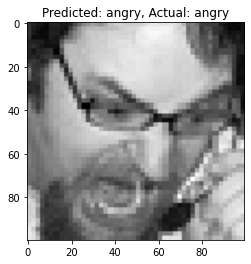

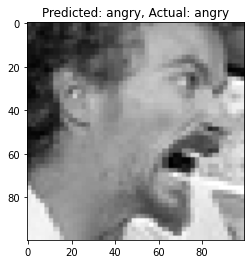

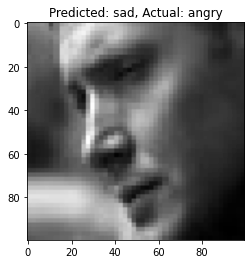

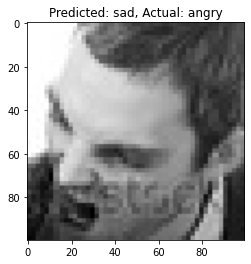

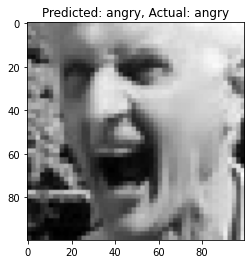

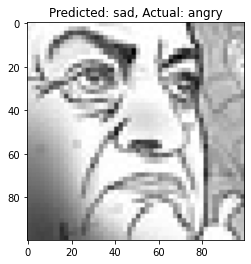

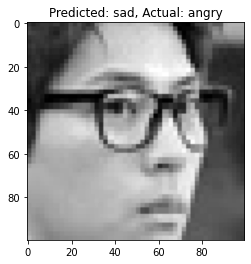

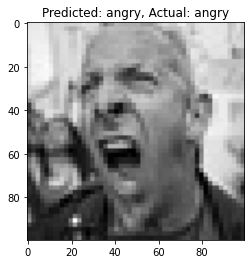

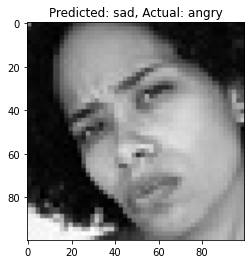

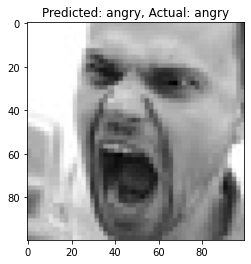

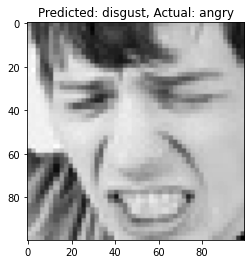

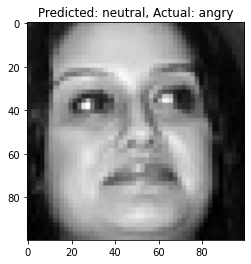

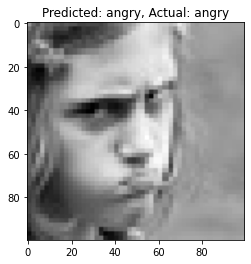

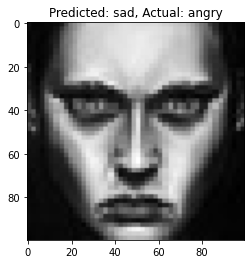

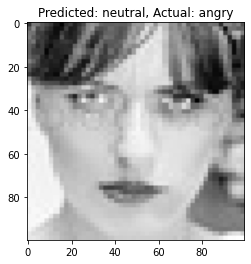

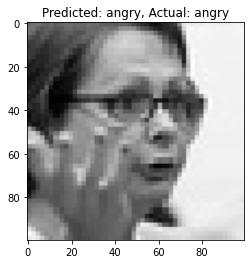

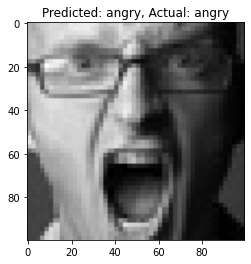

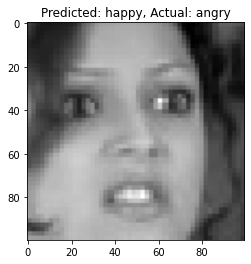

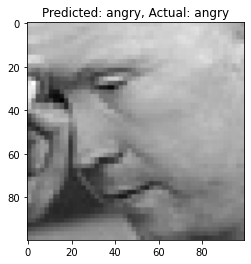

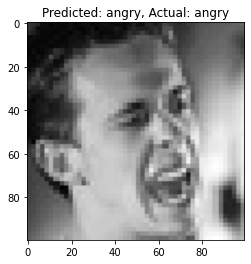

In [16]:
# Load the trained model
model_path = './saved_model/'
model = load_model(model_path)

# Set up the ImageDataGenerator for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
    './Dataset/test',
    target_size=(100, 100),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
    color_mode='grayscale')

# Predict the test set
predictions = model.predict(test_set, steps=test_set.n)

# Extract the predicted class indices
predicted_classes = predictions.argmax(axis=1)

# Mendapatkan label kelas dari set pengujian
class_labels = {v: k for k, v in test_set.class_indices.items()}

# Initialize counters
correct_predictions = 0
incorrect_predictions = 0

# Iterate over predictions and compare with true labels
for i in range(len(predicted_classes)):
    # Compare prediction with actual label
    correct = predicted_classes[i] == test_set.classes[i]

    # Check if we still need more correct or incorrect examples
    if (correct and correct_predictions < 10) or (not correct and incorrect_predictions < 10):
        # Load the image
        img, _ = test_set.next()
        img = img[0]

        # Plot the image
        plt.imshow(img.squeeze(), cmap='gray')
        plt.title(f'Predicted: {class_labels[predicted_classes[i]]}, Actual: {class_labels[test_set.classes[i]]}')
        plt.show()

        # Increment the correct or incorrect counter
        if correct:
            correct_predictions += 1
        else:
            incorrect_predictions += 1

    # Stop after displaying 10 correct and 10 incorrect predictions
    if correct_predictions >= 10 and incorrect_predictions >= 10:
        break


## Evaluasi Model

In [17]:
train_loss, train_accu = my_model.evaluate(training_set)
test_loss, test_accu = my_model.evaluate(test_set)

print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

  ...
    to  
  ['...']
449/449 [==============================] - 40s 90ms/step - loss: 0.7422 - accuracy: 0.77021s -
  ...
    to  
  ['...']
7178/7178 [==============================] - 26s 4ms/step - loss: 1.0770 - accuracy: 0.6531
final train accuracy = 77.02 , validation accuracy = 65.31


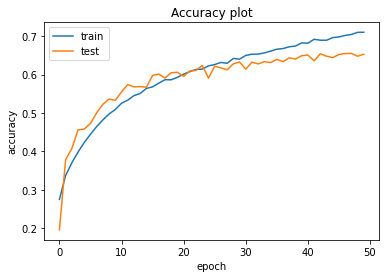

In [18]:
hist = hist.history
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("emotion_model_accuracy.png")

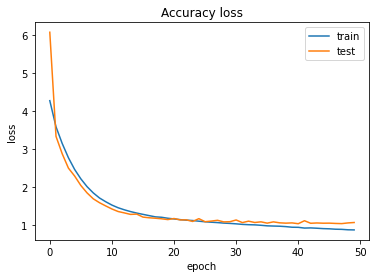

In [19]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("emotion_model_loss.png")

## Load Model

In [6]:
# my_model = tf.keras.models.load_model('UAS.h5')
new_model = tf.keras.models.load_model('UAS.h5')

ValueError: Kernel shape must have the same length as input, but received kernel of shape (3, 3, 1, 32) and input of shape (None, None, 100, 100, 1).

## Confusion Matrik

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
predictions = my_model.predict(test_set)

113/113 [==============================] - 108s 961ms/step


In [10]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [11]:
test_labels = test_set.labels
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [12]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
cm_plot_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']

Confusion matrix, without normalization
[[127   9 113 257 175 162 115]
 [ 11   1  20  23  19  20  17]
 [144  16 120 271 196 167 110]
 [229  10 223 462 321 321 208]
 [189  10 146 321 202 222 143]
 [168   7 138 322 225 238 149]
 [ 91   5 108 210 162 148 107]]


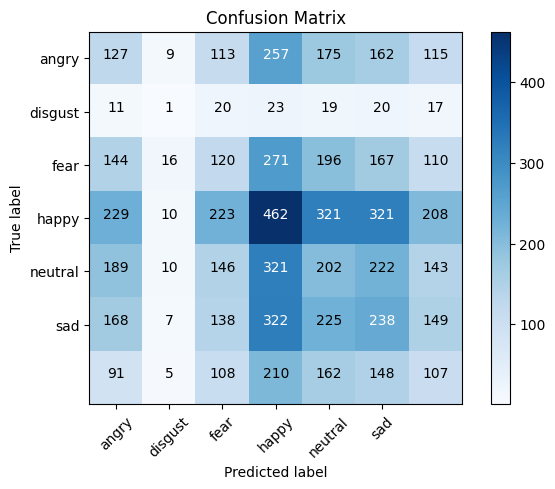

In [14]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')


Betrachtet man die Confusion Matrix, fällt auf, dass die Treffergenauigkeit stark von der Anzahl der vorhandenen Test- und Validierungsdatensätze abhängt. Während Happy häufig richtig erkannt wurde, konnte das Netz  Disgusting deutlich schlechter klassifizieren.

## Gesichtserkennung durch OpenCV

Bevor wir die Mimik des Nutzers interpretieren können, müssen wir das Gesicht des Nutzers erkennen. Hierfür eignet sich die Bildanalyse Bibliothek OpenCV. OpenCV nutzt zur Gesichtserkennung die Markanten Merkmale eines Gesichts (Augen, Nase, Mund, Ohren).

Folgende Grafik veranschaulicht den Prozess, wie OpenCV die Gesichtserkennung vornimmt:



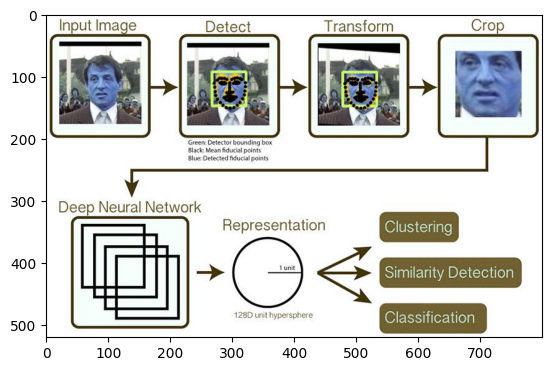

In [15]:
frame = cv2.imread('./opencv.jpg')
plt.imshow(frame)

Angelehnt an: https://pyimagesearch.com/2018/09/24/opencv-face-recognition/

### Implementierung der Gesichtserkennung

Nachfolgend wird die Gesichtserkennung an einem statischen Bild implementiert: 

In [16]:
frame = cv2.imread('./test.jpg')

In [17]:
frame.shape

(360, 540, 3)

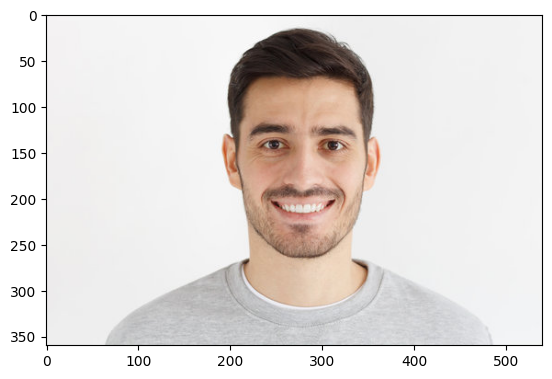

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_frontalface_default.xml")

In [20]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


In [21]:
gray.shape

(360, 540)

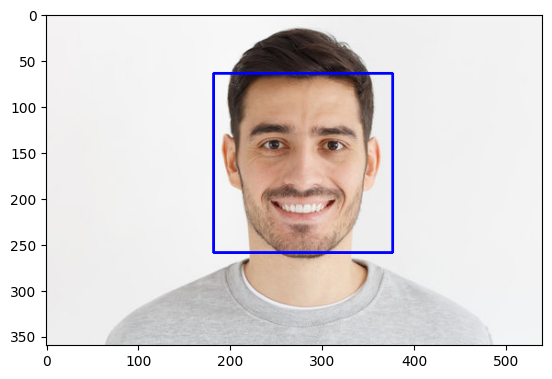

In [23]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB ))

## uji Data

menguji kinerja jaringan kita sekali lagi pada gambar statis. Idealnya, jaringan harus mengenali sedang takut.

# Realtime Video prediction


Setelah berhasil mengembangkan, mengimplementasikan dan menguji semua komponen, langkah selanjutnya adalah menghubungkan semua komponen ke deteksi waktu nyata. Pada langkah pertama, mendefinisikan variabel yang diperlukan:

In [4]:
my_model = load_model('lbpvgg10.h5')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\optimizers\base_optimizer.py:34: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [5]:
path = 'haarcascade_frontalface_default.xml'
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = ""

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] -25

box_coords = ((text_offset_x, text_offset_y), (text_offset_x+text_width+2, text_offset_y-text_height-2))

cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
font = cv2.FONT_HERSHEY_SIMPLEX
  
org = (50, 50)
  
fontScale = 1
   
color = (255, 0, 0)
thickness = 2
cv2.putText(img, 'OpenCV', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
face_roi = None


In [6]:
vid = cv2.VideoCapture(0)

In [7]:


while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Ermittlung aller im Bild enthaltenen Gesichter
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    
    #Iteration über jedes Bild und entsprechende Anpassung der Bildmaße und Bildwerte
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = gray[y:y+h, x:x+w]
        cv2.rectangle(gray, (x,y), (x+w, y+h), (255,0,0),2)
        face_roi = roi_color
    if(face_roi is not None):
        image = cv2.resize(face_roi, (100,100))
        X = np.expand_dims(image, axis = 0)
        X = X/255
        images = np.vstack([X])

        #Jetzt können wir mit unserem Modell eine Vorhersage treffen:
        val=my_model.predict(images)

        prediction_value = np.argmax(val[0])

        #Interpretation der Prediction:
        if(prediction_value == 0):
            status = "Angry"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 1):
            status = "Disgust"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 2):
            status = "Fear"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 3):
            status = "Happy"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 4):
            status = "Neutral"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 5):
            status = "Sad"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))
        elif (prediction_value == 6):
            status = "Suprised"
            x1,y1,w1,h1 = 0,0,175,75
            cv2.rectangle(gray, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
            cv2.putText(gray, status, (x1+int(w1/10), y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

            cv2.putText(gray, status,(100,150), font, 3,(0,0,255), 2, cv2.LINE_4)
            cv2.rectangle(gray, (x,y), (x+w, y+h), (0,0,255))


    cv2.imshow('Face Emotion Recognition', gray)
    if(cv2.waitKey(2) & 0xFF == ord('q')):
        break



    
    #Durch die eingabe von 'q' kann die Webcamaufnahme beendet werden
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()


    

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36864, but received input with shape (1, 160000)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 100, 100), dtype=float32)
  • training=False
  • mask=None

In [4]:
import cv2
import numpy as np

# Inisialisasi video capture
vid = cv2.VideoCapture(0)

# Inisialisasi face cascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    # Membaca frame dari video
    ret, frame = vid.read()
    if not ret:
        print("Failed to grab frame")
        break

    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Deteksi wajah dalam frame
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)

    # Inisialisasi variabel face_roi
    face_roi = None

    # Iterasi atas setiap wajah yang terdeteksi
    for (x, y, w, h) in faces:
        # Menggambar kotak di sekitar wajah
        cv2.rectangle(gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Memotong ROI wajah
        face_roi = gray[y:y+h, x:x+w]

    # Memeriksa jika wajah terdeteksi
    if face_roi is not None:
        # Resize gambar wajah untuk model
        face_roi_resized = cv2.resize(face_roi, (100, 100))
        # Normalisasi piksel
        face_roi_normalized = face_roi_resized / 255.0
        # Menambahkan batch dimension
        face_roi_batch = np.expand_dims(face_roi_normalized, axis=0)

        # Melakukan prediksi menggunakan model
        prediction = my_model.predict(face_roi_batch)
        prediction_value = np.argmax(prediction[0])

        # Menentukan status berdasarkan nilai prediksi
        statuses = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Suprised"]
        status = statuses[prediction_value] if prediction_value < len(statuses) else "Unknown"

        # Menggambar teks status pada gambar
        cv2.putText(gray, status, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Menampilkan gambar
    cv2.imshow('Face Emotion Recognition', gray)

    # Keluar dari loop jika tombol 'q' ditekan
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Membebaskan sumber daya dan menutup jendela
vid.release()
cv2.destroyAllWindows()


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 36864, but received input with shape (1, 160000)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 100, 100), dtype=float32)
  • training=False
  • mask=None